# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests, json
import time
from scipy.stats import linregress

# Import API key
#from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=20000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=20000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

3632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#create a dataframe which will eventually hold all of the required raw data
raw_data = pd.DataFrame(columns =("City","Latitude","Longitude","Max Temp","Wind Speed","Cloudiness","Description", "Humidity"))

In [4]:
# Enter your API key here
api_key = "b9eda530467618ee7b488b14c39de25c"
  
# base_url variable to store url
base_url = "http://api.openweathermap.org/data/2.5/weather?"

#loop
for city_name in cities:
  
    # complete_url variable to store
    # complete url address
    complete_url = base_url + "appid=" + api_key + "&q=" + city_name
  
    # get method of requests module
    # return response object
    response = requests.get(complete_url)
  
    # json method of response object 
    # convert json format data into
    # python format data
    x = response.json()
  
    # Now x contains list of nested dictionaries
    # Check the value of "cod" key is equal to
    # "404", means city is found otherwise,
    # city is not found
    if x["cod"] != "404":
  
        # store the value of "main"
        # key in variable y
        y = x["main"]
        y1 = x["wind"]
        y2 = x["clouds"]
        y3 = x["coord"]
  
        # store the value corresponding
        # to the "temp" key of y
        current_temperature = y["temp_max"]
  
        # store the value corresponding
        # to the "clouds" key of y
        current_clouds = y2["all"]
      
        # store the value corresponding
        # to the "humidity" key of y
        current_humidity = y["humidity"]
    
         # store the value corresponding
        # to the "wind" key of y
        current_wind = y1["speed"]
  
        # store the value of "weather"
        # key in variable z
        z = x["weather"]
        
        lat = y3["lat"]
        long = y3["lon"]
  
        # store the value corresponding 
        # to the "description" key at 
        # the 0th index of z
        weather_description = z[0]["description"]
  
        # print following values
        print(current_temperature, current_clouds, current_humidity, current_wind, weather_description, city_name, lat, long) 
        
        # create a dictionary 'tuple' containing the information that we want to put into the dataframe.
        # The advantage of using a dictionary here is that it is a nice, readable way to assocate the columns
        # in our dataframe with the variables that we have extracted from the json weather data THAT DOES NOT
        # DEPEND ON HOW WE ORDER THE DATA.
        row_to_add = {'City':city_name,'Latitude':lat,'Longitude':long,'Max Temp':current_temperature,'Cloudiness':current_clouds,'Wind Speed':current_wind,'Description':weather_description,'Humidity':current_humidity}
        
        # add this new row of data to the dataframe ... N.B.  the append() method of the DataFrame class is
        # immutable.  That is, calling this method does not, by itself, actually modify the dataframe.  Rather, it
        # RETURNS an object which is the modified dataframe.  So, we have to call the append() method, and then 
        # basically overwrite the original dataframe with this new modified dataframe.
        raw_data = raw_data.append(row_to_add, ignore_index = True)
   
        
    else:
        print(" City Not Found ")

296.67 100 67 8.08 overcast clouds rikitea -23.1203 -134.9692
271.9 74 91 0.67 broken clouds pevek 69.7008 170.3133
285.37 100 83 2.24 light rain new norfolk -42.7826 147.0587
281.15 90 87 2.06 overcast clouds stromness 58.965 -3.296
291.15 1 32 2.06 clear sky albany 42.6001 -73.9662
297.7 45 77 0.74 scattered clouds jacareacanga -6.2222 -57.7528
294.12 3 77 3.55 clear sky arraial do cabo -22.9661 -42.0278
284.07 0 86 3.93 clear sky lebu -37.6167 -73.65
303.71 14 79 4.53 few clouds victoria 22.2855 114.1577
286.15 75 94 3 heavy intensity rain nikolskoye 59.7035 30.7861
286.6 0 23 4.75 clear sky mandalgovi 45.7625 106.2708
300.15 39 54 5.14 scattered clouds alyangula -13.8483 136.4192
283.15 100 46 3.6 overcast clouds aklavik 68.2191 -135.0107
289.15 1 29 3.09 clear sky jamestown 42.097 -79.2353
272.77 100 91 4.09 overcast clouds tiksi 71.6872 128.8694
301.59 64 73 4.25 light rain jian 27.1172 114.9793
279.15 20 70 2.06 few clouds ushuaia -54.8 -68.3
299.15 1 8 6.17 clear sky price 39.5

297.15 75 100 2.79 light rain monrovia 6.3005 -10.7969
300.37 20 29 6.69 few clouds portland 45.5234 -122.6762
304.15 0 29 2.06 clear sky dagana 16.5165 -15.5068
288.15 100 66 2.24 overcast clouds mar del plata -38.0023 -57.5575
303.23 36 69 4.36 light rain buala -8.145 159.5921
298.15 75 94 5.14 light rain cayenne 4.9333 -52.3333
 City Not Found 
290.44 100 52 0.62 overcast clouds yaroslavskiy 44.1683 132.2072
301.72 22 37 3.22 few clouds surajgarh 28.3124 75.7347
266.17 42 89 1.06 scattered clouds tazovskiy 67.4667 78.7
294.15 6 37 10.8 clear sky geraldton -28.7667 114.6
287.06 75 75 2.22 light rain rio grande -32.035 -52.0986
291.15 40 29 3.6 scattered clouds sturgeon falls 46.3646 -79.9326
285.65 83 50 3.73 broken clouds rawson -43.3002 -65.1023
302.15 0 20 4.12 clear sky buraydah 26.326 43.975
295.15 20 94 3.09 fog pemba -12.974 40.5178
296.32 0 58 1.52 clear sky namibe -15.1961 12.1522
301.5 100 81 12.03 light rain kavaratti 10.5669 72.642
288.29 0 79 8.01 clear sky saldanha -33.

300.14 90 59 1.54 overcast clouds birao 10.2849 22.7882
293.71 7 78 1.34 clear sky muriwai beach -36.8167 174.45
292.04 0 59 1 light rain pekin 39.9075 116.3972
295.51 100 97 1.65 overcast clouds tongren 27.7172 109.1853
286.15 40 94 5.14 scattered clouds mount gambier -37.8333 140.7667
279.37 100 78 2.18 overcast clouds putina -15.4667 -69.4333
273.54 100 90 0.56 overcast clouds evensk 61.95 159.2333
272.19 100 61 7.47 overcast clouds yerbogachen 61.2767 108.0108
275.49 11 83 1.23 few clouds nanortalik 60.1432 -45.2371
301.15 20 69 2.57 few clouds loiza 18.4313 -65.8802
274.15 90 93 6.69 overcast clouds havoysund 70.9963 24.6622
291.82 10 54 1.35 clear sky kushmurun 52.4503 64.6311
286.12 23 36 6.08 few clouds kyra 49.5776 111.9753
292.15 1 39 1.54 clear sky southbury 41.4815 -73.2132
284.55 0 58 1.73 clear sky shu 43.5983 73.7614
287.45 0 76 2.31 clear sky kostyantynivka 48.5277 37.7069
286.47 2 89 1.62 clear sky mporokoso -9.3727 30.125
286.15 0 88 1.54 clear sky coquimbo -29.9533 -

277.15 90 81 1.03 overcast clouds storsteinnes 69.2408 19.2344
301.15 75 78 3.09 broken clouds champerico 14.3 -91.9167
281.9 8 90 2.77 clear sky zbarazh 49.6636 25.7762
299.32 100 74 4.78 overcast clouds panaba 21.2833 -88.2667
287.1 86 86 2.74 overcast clouds ginir 7.1333 40.7
291.33 100 41 6.32 overcast clouds fujin 47.26 132.0322
305.37 20 50 2.4 haze niwari 28.8833 77.5333
294.76 98 96 0.9 overcast clouds tocache -8.1842 -76.5125
 City Not Found 
293.36 0 88 4.57 clear sky inhambane -23.865 35.3833
290.93 86 45 0.45 overcast clouds novyye burasy 52.1324 46.0714
304.82 20 66 3.6 few clouds santa rosa 14.3122 121.1114
287.24 84 97 1.27 broken clouds butembo 0.15 29.2833
283.15 0 87 0.42 clear sky oskemen 49.9565 82.6119
300.15 40 73 9.77 scattered clouds alice 27.7523 -98.0697
295.93 1 64 3.09 clear sky houma 29.5958 -90.7195
303.15 40 70 1.54 haze port moresby -9.4431 147.1797
299.15 99 25 3.6 overcast clouds glenwood springs 39.5505 -107.3248
298.13 68 55 0.56 broken clouds san ma

298.04 100 80 2.63 overcast clouds kontagora 10.3999 5.4695
 City Not Found 
276.48 92 87 0.51 overcast clouds bonavista 48.6499 -53.1147
298.64 100 86 1.49 overcast clouds meulaboh 4.1363 96.1285
299.15 75 94 2.06 broken clouds alenquer -1.9417 -54.7383
303.15 20 70 3.09 few clouds nha trang 12.25 109.1833
284.49 100 45 2.3 overcast clouds tigil 57.8 158.6667
292.91 25 64 2.15 scattered clouds paramirim -13.4425 -42.2389
294.99 0 37 5.85 clear sky jalu 29.0331 21.5482
294.37 92 71 7.68 overcast clouds sechura -5.5569 -80.8222
295.65 86 89 2.49 light rain mananara -16.1667 49.7667
290.95 4 65 3.32 clear sky misratah 32.3754 15.0925
304.94 1 9 2.23 clear sky bilma 18.6853 12.9164
292.69 0 27 7.27 clear sky seydi 39.4816 62.9137
298.15 20 88 2.06 few clouds porto novo 6.4965 2.6036
283.38 89 97 3.6 overcast clouds arkhangelskoye 55.8549 35.3287
297.77 6 77 3.72 clear sky tamandare -8.7597 -35.1047
291.54 3 76 2.42 clear sky taltal -25.4 -70.4833
299.58 55 61 1.97 broken clouds atambua -9

299.39 100 84 2.28 overcast clouds tabou 4.423 -7.3528
288.8 96 94 1.84 overcast clouds la sierra 2.1784 -76.7626
 City Not Found 
303.8 100 70 2.32 overcast clouds dahanu 19.9667 72.7333
294.15 75 43 3.09 broken clouds miraflores 19.2167 -98.8083
284.26 11 91 2.24 few clouds portsmouth 50.799 -1.0913
301.9 8 76 3.98 clear sky jieshi 22.8134 115.8257
287.65 0 39 2.91 clear sky kang -23.6752 22.7876
284.26 95 88 0.71 overcast clouds lana 46.6124 11.1559
287.15 90 82 2.06 overcast clouds rapid valley 44.0625 -103.1463
290.15 75 72 9.77 broken clouds waipawa -41.4122 175.5153
300.15 20 78 0.29 few clouds mae ramat 16.984 98.5166
280.37 90 100 2 fog svetlyy 54.675 20.1347
299.15 40 78 1.54 scattered clouds chazuta -6.5742 -76.1367
292.15 20 34 1.03 few clouds shelburne 44.0787 -80.2041
280.27 100 77 4.95 overcast clouds verkhnevilyuysk 63.4453 120.3167
299.15 40 78 3.09 scattered clouds la romana 18.4273 -68.9728
276.38 100 89 8.59 light rain okhotsk 59.3833 143.3
295.85 100 98 1.15 overca

298.16 0 25 6.55 clear sky sabha 27.0377 14.4283
 City Not Found 
276.27 20 59 3.99 few clouds rudnogorsk 57.2639 103.7519
284.91 100 92 1.92 overcast clouds agirish 61.9247 63.0231
297.73 100 90 4.87 overcast clouds soure -0.7167 -48.5233
 City Not Found 
289.78 5 40 1.48 clear sky zaysan 47.4667 84.8667
300.37 20 78 8.75 few clouds oranjestad 12.524 -70.027
296.59 57 91 1.11 broken clouds santa isabel do rio negro -0.4139 -65.0192
291.15 75 94 2.57 broken clouds ponta delgada 37.7333 -25.6667
287.15 0 94 2 clear sky seredka 58.1584 28.1858
280.93 100 65 0.08 overcast clouds xining 36.6167 101.7667
290.36 90 72 4.49 overcast clouds ust-kishert 57.3654 57.2495
285.15 11 35 4.12 few clouds haines junction 60.7522 -137.5108
301.15 20 74 4.63 few clouds black river 18.0264 -77.8487
291.48 90 77 3.09 overcast clouds lima -12.0432 -77.0282
298.73 19 85 3.87 few clouds sinnamary 5.3833 -52.95
302.79 100 46 4.66 overcast clouds kelo 9.3086 15.8066
301.15 40 61 7.2 scattered clouds ahuimanu 21

279.08 100 73 2.01 overcast clouds predivinsk 57.0669 93.4378
296.15 22 88 3.09 few clouds gunjur 13.2019 -16.7339
293.85 27 17 2.56 scattered clouds khash 28.2211 61.2158
283.15 0 66 3.13 clear sky parkes -33.1333 148.1833
 City Not Found 
303.15 20 70 4.12 few clouds taitung 22.7583 121.1444
293.34 6 30 0.55 clear sky viransehir 37.2353 39.7631
282.04 100 92 1.06 overcast clouds sobrance 48.7445 22.1814
299.82 1 21 1.54 clear sky nampa 43.5407 -116.5635
284.38 100 39 1.45 overcast clouds milkovo 54.7167 158.6167
290.78 0 66 2.28 clear sky caarapo -22.6342 -54.8222
291.15 7 55 3.09 clear sky tsovazard 40.4709 45.0588
295.79 100 89 3.18 overcast clouds ndele 8.4109 20.6473
306.5 96 29 1.62 overcast clouds tera 14.0078 0.7531
291.79 100 61 0.8 overcast clouds illapel -31.6308 -71.1653
296.47 100 97 3.17 moderate rain jingdezhen 29.2947 117.2079
298.25 0 40 0.48 clear sky panzhihua 26.5851 101.7128
304.83 2 58 3.42 clear sky honiara -9.4333 159.95
294.94 18 87 2.9 few clouds antalaha -14

296.8 100 74 6.92 overcast clouds santa maria da boa vista -8.8078 -39.8256
298.3 92 71 1.24 overcast clouds riberalta -10.9833 -66.1
285.27 11 31 4.76 few clouds bukachacha 52.9833 116.9167
289.15 0 44 4.12 clear sky samarkand 39.6542 66.9597
299.15 40 89 4.12 scattered clouds bartica 6.4 -58.6167
300.81 0 14 3.65 clear sky rawah 34.4816 41.9093
286.41 100 92 7.15 overcast clouds huainan 32.6264 116.9969
296.15 75 73 3.6 broken clouds marica -22.9194 -42.8186
298.03 100 79 0.28 overcast clouds mancio lima -7.6142 -72.8958
291.15 75 82 1.03 broken clouds imbituba -28.24 -48.6703
286.48 20 82 1.54 few clouds salta -24.7859 -65.4117
281.33 100 65 8.24 overcast clouds sosnovo-ozerskoye 52.5249 111.5418
289.72 100 42 3.9 overcast clouds log 49.4844 43.8613
287.15 0 72 0.51 clear sky tudora 47.5167 26.6333
295.58 100 98 0.65 overcast clouds mitu 1.1983 -70.1733
277.15 0 60 4.63 clear sky vogar 63.9832 -22.3874
284.15 42 93 4.12 scattered clouds liverpool 53.4106 -2.9779
296.15 0 31 4 clear 

289.81 11 67 4.29 few clouds kochki 54.3358 80.4806
287.04 98 81 1.54 overcast clouds rosario -32.9468 -60.6393
294.08 21 16 3.28 few clouds chaman 30.9236 66.4512
294.94 0 50 3.18 clear sky xingyi 24.1877 102.817
286.89 1 69 1.26 clear sky mwinilunga -11.7358 24.4293
291.36 0 51 3.71 clear sky esil 51.9556 66.4042
290.15 75 51 2.57 broken clouds kenora 49.8167 -94.4337
303.1 100 58 3.74 light rain indapur 18.3 73.25
303.15 40 94 2.57 haze puri 19.8 85.85
296.98 79 85 4.21 broken clouds puerto baquerizo moreno -0.9 -89.6
289.53 30 55 3.19 scattered clouds salamiyah 35.0113 37.0532
294.15 0 88 3.09 clear sky marsa matruh 31.3525 27.2453
282.15 0 93 1 clear sky chekalin 54.0969 36.245
296.15 1 13 8.23 clear sky show low 34.2542 -110.0298
296.44 18 79 1.92 few clouds xiaoweizhai 26.1903 107.5125
283.15 75 93 5 moderate rain korsakov 46.6328 142.7813
302.55 100 71 1.91 overcast clouds ko samui 9.5357 99.9357
299.15 20 94 3.09 few clouds chirongui -12.9319 45.1483
287.15 90 58 3.6 overcast 

294.15 75 43 3.6 broken clouds mayo 38.8876 -76.5119
296.31 61 39 3.97 broken clouds san julian 21.0167 -102.1667
278.84 100 99 2.12 overcast clouds vagamo 61.8751 9.0967
293.85 100 68 1.71 overcast clouds sikonge -5.6333 32.7667
292.15 20 68 9.26 few clouds canico 32.6333 -16.85
301.53 7 74 0.72 clear sky chabahar 25.2919 60.643
287.59 0 94 0.18 clear sky cruzeiro do sul -29.5128 -51.9853
288.15 30 47 3.6 scattered clouds pafos 34.7667 32.4167
283.15 90 93 1.54 overcast clouds den helder 52.9599 4.7593
283.3 88 64 1.51 overcast clouds toora-khem 52.4675 96.11
 City Not Found 
299.15 1 61 9.26 clear sky del rio 29.3627 -100.8968
286.15 45 82 2 scattered clouds oktyabrskoye 43.0645 44.7417
294.15 20 23 3.09 few clouds palmer 42.1584 -72.3287
303.15 40 89 6.92 mist manavalakurichi 8.1333 77.3
285.37 100 83 0.89 overcast clouds caledon -34.23 19.4265
284.26 75 100 3.09 broken clouds wageningen 51.9667 5.6667
 City Not Found 
301.15 40 78 2.06 mist yanam 16.7333 82.2167
302.15 75 84 1.03 b

286.15 75 88 2.06 broken clouds sliven 42.6858 26.3292
 City Not Found 
295.94 100 91 1.42 overcast clouds ewo -0.8725 14.8206
295.81 100 98 1.33 overcast clouds cartagena del chaira 1.3349 -74.8429
284.48 100 83 2.68 overcast clouds viedma -40.8135 -62.9967
301.15 20 83 1.54 few clouds makasar -5.14 119.4221
298.05 100 79 0.14 overcast clouds rodrigues alves -7.738 -72.6509
302.59 71 84 4.56 broken clouds jiaojiang 28.6803 121.4428
288.13 100 88 2.33 overcast clouds turtas 58.9417 69.1325
292.04 22 82 1.4 few clouds san ramon de la nueva oran -23.1322 -64.326
282.04 100 88 1.34 overcast clouds lohja 60.2486 24.0653
277.02 100 81 3.24 overcast clouds arman 59.7 150.1667
286.15 0 62 1.03 clear sky constantine 36.365 6.6147
285.93 100 100 2.27 light rain marienburg 54.0359 19.0266
297.89 100 95 0.7 overcast clouds el real de santa maria 8.109 -77.7325
299.15 20 88 0.51 few clouds brazzaville -4.2658 15.2832
300.15 75 89 2.06 broken clouds irawan 9.8012 118.6923
292.04 75 63 3.6 broken cl

282.66 100 82 4.62 light rain povenets 62.8487 34.8262
288.01 87 71 3.26 overcast clouds korem 12.5058 39.5228
284.4 69 95 0.88 broken clouds fandriana -20.2333 47.3833
 City Not Found 
297.15 1 50 2.57 clear sky pascagoula 30.3658 -88.5561
299.15 1 27 6.69 clear sky north ogden 41.3072 -111.9602
292.59 100 100 9.83 overcast clouds tsuruga 35.6455 136.0558
299.15 75 89 1.15 light rain porto velho -8.7619 -63.9039
297.15 20 94 2.06 few clouds natal -5.795 -35.2094
302.15 75 70 4.12 broken clouds morant bay 17.8815 -76.4093
298.15 40 69 5.66 scattered clouds galveston 29.3669 -94.9669
287.31 0 32 2.05 clear sky urusha 54.05 122.9
299.15 75 94 1.54 broken clouds ambon -3.6954 128.1814
 City Not Found 
293.15 1 68 2.57 clear sky crestview 30.7621 -86.5705
286.77 30 60 0.35 scattered clouds caconda -13.7333 15.0667
301.42 92 74 3.51 overcast clouds samarai -10.6167 150.6667
292.15 4 41 1.54 clear sky barrie 44.4001 -79.6663
296.05 98 71 0.52 overcast clouds mweka -4.85 21.5667
303 12 72 6.0

304.64 73 37 2.56 broken clouds pratapgarh 24.0333 74.7833
281.15 40 81 5 scattered clouds barsovo 61.1667 73.1667
304.15 20 74 2.57 few clouds davila 18.4726 120.5763
290.15 0 34 3.09 clear sky ortakoy 38.7373 34.0387
290.15 75 82 2.57 broken clouds maua -23.6678 -46.4614
303.53 100 72 1.89 overcast clouds shirgaon 19.7 72.7
292.04 99 36 5.14 overcast clouds weymouth 42.2209 -70.9398
289.14 10 83 1.33 clear sky tsiroanomandidy -18.7667 46.0333
298.91 73 85 0.54 broken clouds payo -3.7508 103.6372
295.09 10 81 0.48 clear sky bulungu -4.55 18.6
282.15 40 93 1.54 scattered clouds achim 53.0112 9.033
300.93 100 77 4.24 overcast clouds port-gentil -0.7193 8.7815
302.98 0 38 7.65 clear sky ubauro 28.1652 69.7289
 City Not Found 
287.59 75 88 1.54 broken clouds san giuliano terme 43.7616 10.4404
296.15 75 88 6.17 light rain kadoma 34.7333 135.5833
285.18 100 97 0.39 overcast clouds lodeynoye pole 60.726 33.5531
300.54 98 63 2.57 overcast clouds banikoara 11.2985 2.4386
298.99 69 40 1.93 brok

282.77 100 96 2.12 moderate rain koshurnikovo 54.1667 93.3
279.19 91 84 3.23 overcast clouds harbour breton 47.4833 -55.7983
275.59 100 67 2.97 overcast clouds myaundzha 63.0494 147.1858
293.15 0 52 4.63 clear sky perth -31.9333 115.8333
286.21 5 73 1.02 clear sky luena -11.7833 19.9167
294.18 100 96 4.48 overcast clouds rongcheng 30.634 117.8517
284.26 100 90 0.45 overcast clouds forst 51.7333 14.6333
283.67 0 52 4.16 clear sky forbes -33.3833 148.0167
287.15 40 94 1.34 scattered clouds gornoye loo 43.7129 39.6049
303.15 0 70 3 clear sky zhenhai 24.2582 118.0905
282.59 96 96 4.48 overcast clouds northeim 51.7 10
289.38 100 94 5.74 overcast clouds hede 33.7681 120.2517
289.84 100 42 4.85 light rain dongying 37.4564 118.4856
 City Not Found 


ConnectionError: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# the info() method is really very useful, in particular because it will tell us the data TYPE of each
# column in the dataframe.

# Notice, for example, that Cloudiness and Humidity are actually string objects, whereas we expected them
# to be numerical percentages.  So, we are going to have to deal with that!
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         2017 non-null   object 
 1   Latitude     2017 non-null   float64
 2   Longitude    2017 non-null   float64
 3   Max Temp     2017 non-null   float64
 4   Wind Speed   2017 non-null   float64
 5   Cloudiness   2017 non-null   float64
 6   Description  2017 non-null   object 
 7   Humidity     2017 non-null   float64
dtypes: float64(6), object(2)
memory usage: 126.2+ KB


In [8]:
# convert the Cloudiness and Humidity colums from strings into numerical values (floating point numbers).
raw_data['Cloudiness'] = raw_data['Cloudiness'].astype(float)
raw_data['Humidity'] = raw_data['Humidity'].astype(float)

# print the dataframe, just to check that everything looks good!
raw_data

,City,Latitude,Longitude,Max Temp,Wind Speed,Cloudiness,Description,Humidity
0,rikitea,-23.1203,-134.9692,296.67,8.08,100.0,overcast clouds,67.0
1,pevek,69.7008,170.3133,271.90,0.67,74.0,broken clouds,91.0
2,new norfolk,-42.7826,147.0587,285.37,2.24,100.0,light rain,83.0
3,stromness,58.9650,-3.2960,281.15,2.06,90.0,overcast clouds,87.0
4,albany,42.6001,-73.9662,291.15,2.06,1.0,clear sky,32.0
...,...,...,...,...,...,...,...,...
2012,gornoye loo,43.7129,39.6049,287.15,1.34,40.0,scattered clouds,94.0
2013,zhenhai,24.2582,118.0905,303.15,3.00,0.0,clear sky,70.0
2014,northeim,51.7000,10.0000,282.59,4.48,96.0,overcast clouds,96.0
2015,hede,33.7681,120.2517,289.38,5.74,100.0,overcast clouds,94.0


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# create a new sub-dataframe that contains only the rows where Humidity>100%
clean_city_high_humidity = raw_data[raw_data['Humidity'] > 100.0]

# check how many rows there are with this condition.
len(clean_city_high_humidity)

0

In [10]:
#  Get the indices of cities that have humidity over 100%.
# 
#  This step seems unnecessary, even if there is high humidity data, as we can remove those
#  entries in a much simpler way

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#
# The above comments in this cell were the professor's comments.  It is way easier to just parse the dataframe
# in the following way, rather than complicating matters by worrying about specific indices.
clean_city_data = raw_data[raw_data['Humidity'] <= 100.0]

In [12]:
# Export the clean city data here:
clean_city_data.to_csv(output_data_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

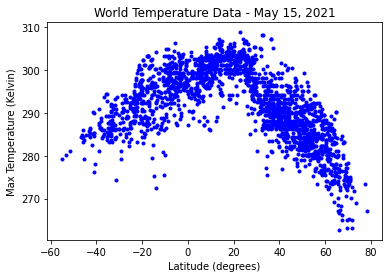

In [13]:
# import that data library, and then get today's date: the format will be 'Month XX, YYYY' 
from datetime import date
today = date.today().strftime("%B %d, %Y")

# Make a plot of Max Temp vs. Latitude
#
# <rant>
# Please note:  the accepted way of specifying any x-y plot is to day "y vs. x" (and not x vs. y as your
# professor has done above).  This is a huge pet peeve of mine!!!!!!!!!!!!!  We are trying to see if the temperature
# (i.e the dependent variable) depends on the latitude (i.e. the independent variable).  That is, we are trying
# to answer the question: 'Does Temperature depend on Latitude?'  Thus, we clearly want temperature on the y-axis
# and latitude on the x-axis.
#
# For the plot() method in matplotlib.pyplot, the x-data goes FIRST in the call, and then the y-data goes
# SECOND.  I think that this is probably where this new WRONG way of calling this 'X vs. Y' comes from, and it
# bothers me to no end, and it is just wrong.
# </rant>
#
plt.plot(clean_city_data['Latitude'],clean_city_data['Max Temp'],'b.')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Max Temperature (Kelvin)')
plt.title('World Temperature Data - %s' % today)
plt.savefig('World_Temperature.png')
plt.show()

## Latitude vs. Humidity Plot

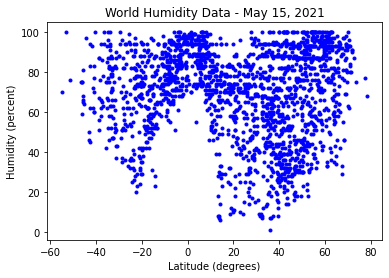

In [14]:
plt.plot(clean_city_data['Latitude'],clean_city_data['Humidity'],'b.')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Humidity (percent)')
plt.title('World Humidity Data - %s' % today)
plt.savefig('World_Humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

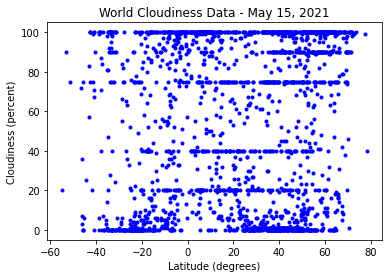

In [15]:
plt.plot(clean_city_data['Latitude'],clean_city_data['Cloudiness'],'b.')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Cloudiness (percent)')
plt.title('World Cloudiness Data - %s' % today)
plt.savefig('World_Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

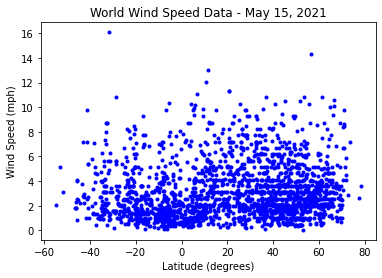

In [16]:
plt.plot(clean_city_data['Latitude'],clean_city_data['Wind Speed'],'b.')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Wind Speed (mph)')
plt.title('World Wind Speed Data - %s' % today)
plt.savefig('World_WindSpeed.png')
plt.show()

## Linear Regression

In [17]:
# The first thing that we want to do here is to create a function which will handle the linear regression 
# and plotting for us.  This will reduce a lot of duplicate coding!
# 
# When we call this function, we are going to pass to it:
#
# 1. the x-data
# 2. the y-data
# 3. the label for the x-axis
# 4. the label for the y-axis
# 5. the title of the plot
#

def linear_plot(x,y,xstring,ystring,thistitle):
    
    # do the linear regression ... all we need to do is to call the lingress() method that we imported above
    res = linregress(x, y)
    slope = res.slope
    intercept = res.intercept
    
    # get today's date
    from datetime import date
    today = date.today().strftime("%B %d, %Y")

    # create the plot
    #
    # first, plot the actual data
    plt.plot(x,y,'b.',label='Data')    
    # next, plot the linear regression fit.
    plt.plot(x, intercept + slope*x, 'r-', label='Linear Fit')
    # finally, add the axis labels, title, and legend
    plt.xlabel(xstring)
    plt.ylabel(ystring)
    plt.title(thistitle % today)
    plt.legend()
    plt.show()
    
    
    # With any linear regression plot, there are typically two things that we can use to decide
    # whether or not the y-variable actually does depend on the x-variable:
    # 
    # 1. The slope of the linear regression, WITH AN ASSOCIATED UNCERTAINTY.
    # 2. The R^2 value (i.e. the correlation coefficient)
    # 
    # The following is some pretty standard code that uses the Student's t-distribution
    # together with summary statistics from the linear regression in order to extract these two quantities.
    #
    from scipy.stats import t
    tinv = lambda p, dof: abs(t.ppf(p/2, dof))
    ts = tinv(0.05, len(x)-2)
    print(f"R-squared: {res.rvalue**2:.6f}")
    print(f"slope (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f}")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1467 entries, 1 to 2016
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         1467 non-null   object 
 1   Latitude     1467 non-null   float64
 2   Longitude    1467 non-null   float64
 3   Max Temp     1467 non-null   float64
 4   Wind Speed   1467 non-null   float64
 5   Cloudiness   1467 non-null   float64
 6   Description  1467 non-null   object 
 7   Humidity     1467 non-null   float64
dtypes: float64(6), object(2)
memory usage: 103.1+ KB


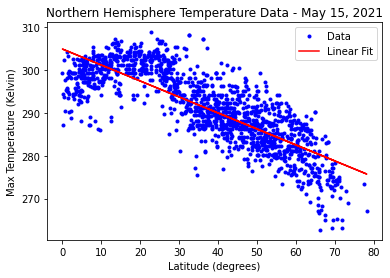

R-squared: 0.652295
slope (95%): -0.372092 +/- 0.013923


In [18]:
clean_city_north = clean_city_data[clean_city_data['Latitude']>0.0]
clean_city_north.info()

linear_plot(clean_city_north['Latitude'],clean_city_north['Max Temp'],'Latitude (degrees)','Max Temperature (Kelvin)','Northern Hemisphere Temperature Data - %s')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

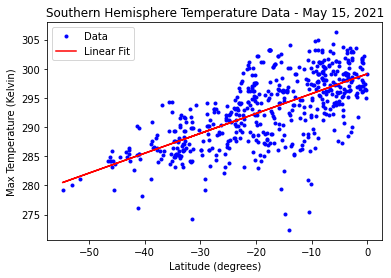

R-squared: 0.440197
slope (95%): 0.339814 +/- 0.032155


In [19]:
clean_city_south = clean_city_data[clean_city_data['Latitude']<0.0]

linear_plot(clean_city_south['Latitude'],clean_city_south['Max Temp'],'Latitude (degrees)','Max Temperature (Kelvin)','Southern Hemisphere Temperature Data - %s')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

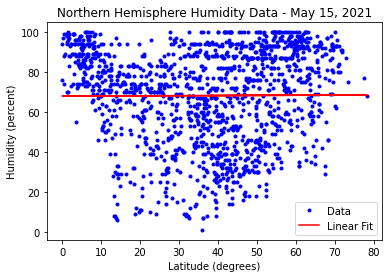

R-squared: 0.000026
slope (95%): 0.006373 +/- 0.064332


In [20]:
linear_plot(clean_city_north['Latitude'],clean_city_north['Humidity'],'Latitude (degrees)','Humidity (percent)','Northern Hemisphere Humidity Data - %s')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

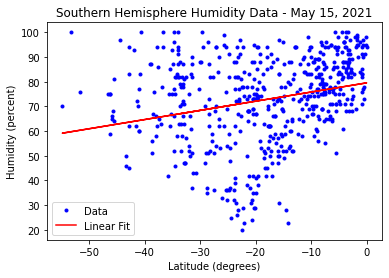

R-squared: 0.065296
slope (95%): 0.371843 +/- 0.118051


In [21]:
linear_plot(clean_city_south['Latitude'],clean_city_south['Humidity'],'Latitude (degrees)','Humidity (percent)','Southern Hemisphere Humidity Data - %s')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

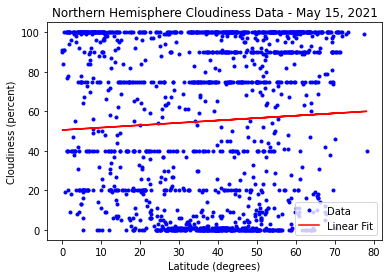

R-squared: 0.003166
slope (95%): 0.120499 +/- 0.109578


In [22]:
linear_plot(clean_city_north['Latitude'],clean_city_north['Cloudiness'],'Latitude (degrees)','Cloudiness (percent)','Northern Hemisphere Cloudiness Data - %s')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

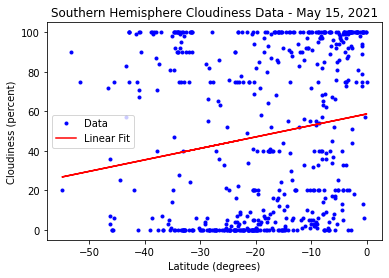

R-squared: 0.028383
slope (95%): 0.581392 +/- 0.285435


In [23]:
linear_plot(clean_city_south['Latitude'],clean_city_south['Cloudiness'],'Latitude (degrees)','Cloudiness (percent)','Southern Hemisphere Cloudiness Data - %s')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

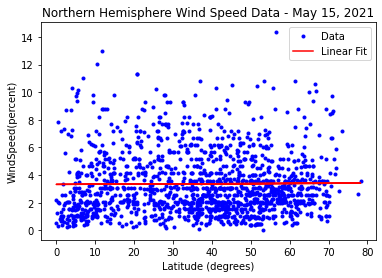

R-squared: 0.000090
slope (95%): 0.001136 +/- 0.006154


In [24]:
linear_plot(clean_city_north['Latitude'],clean_city_north['Wind Speed'],'Latitude (degrees)','WindSpeed(percent)','Northern Hemisphere Wind Speed Data - %s')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

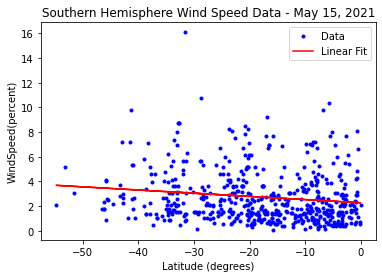

R-squared: 0.021608
slope (95%): -0.025767 +/- 0.014549


In [25]:
linear_plot(clean_city_south['Latitude'],clean_city_south['Wind Speed'],'Latitude (degrees)','WindSpeed(percent)','Southern Hemisphere Wind Speed Data - %s')

### A Proper Analysis of the Temperature vs. Latitude Data

#### Now, let's do the fit of temperature vs. latitude correctly!!! ####

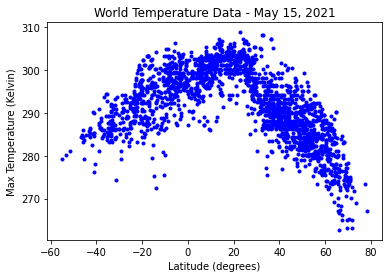

In [26]:
plt.plot(clean_city_data['Latitude'],clean_city_data['Max Temp'],'b.')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Max Temperature (Kelvin)')
plt.title('World Temperature Data - %s' % today)
plt.savefig('World_Temperature.png')
plt.show()

Coefficients (from curve_fit)
[ 2.98881918e+02  2.61381155e-01 -9.53393293e-03 -2.05777837e-04
  3.14489455e-06  4.93526860e-08 -7.14017162e-10]
Covariance Matrix (from curve_fit)
[[ 4.34008524e-02 -1.34612869e-04 -8.06705268e-05  5.83725040e-07
   3.04475235e-08 -2.72155684e-10 -1.00561883e-12]
 [-1.34612869e-04  2.61118695e-04 -1.42419306e-06 -3.45760871e-07
   3.27123117e-09  9.85985299e-11 -1.16292521e-12]
 [-8.06705268e-05 -1.42419306e-06  2.95761258e-07 -1.58849301e-10
  -1.52171208e-10  6.71413608e-13  1.15263731e-14]
 [ 5.83725040e-07 -3.45760871e-07 -1.58849301e-10  5.74104846e-10
  -4.50615150e-12 -1.86202116e-13  2.11504103e-15]
 [ 3.04475235e-08  3.27123117e-09 -1.52171208e-10 -4.50615150e-12
   1.25381087e-13  1.09557235e-15 -2.43578344e-17]
 [-2.72155684e-10  9.85985299e-11  6.71413608e-13 -1.86202116e-13
   1.09557235e-15  6.77383332e-17 -7.33738885e-19]
 [-1.00561883e-12 -1.16292521e-12  1.15263731e-14  2.11504103e-15
  -2.43578344e-17 -7.33738885e-19  9.60028324e-21]]


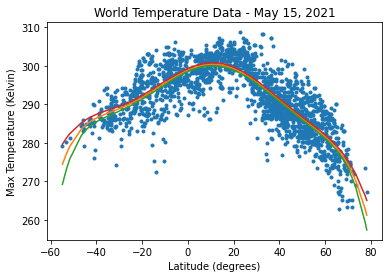

In [27]:
from scipy.optimize import curve_fit

def fitfunction(x,*paramlist):
    #return paramlist[2]-paramlist[0]*(np.sin(np.pi/180.0*(x-paramlist[1])))**2
    return paramlist[0]+paramlist[1]*x+paramlist[2]*x**2+ \
        paramlist[3]*x**3+paramlist[4]*x**4+paramlist[5]*x**5+paramlist[6]*x**6

#init_vals = [35.0,3.0,300.0]
init_vals = [300,3.0,.3,.03,0.003,0.0003,.00003]

clean_city_data = clean_city_data.sort_values(by=['Latitude'])

xi = clean_city_data['Latitude']
yi = clean_city_data['Max Temp']

popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
#print ("Final Result: y = (%0.2f +/- %0.2f)  - (%0.2f +/- %0.2f)*sin^2(Pi/180(x - (%0.2f +/- %0.2f)) " 
#       % (popt[2],perr[2],popt[0],perr[0],popt[1],perr[1]))

residuals = yi - fitfunction(xi, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((yi-np.mean(yi))**2)
r_squared = 1 - (ss_res / ss_tot)

print(f"R-squared: {r_squared:.6f}")

plt.plot(xi,yi,'.')

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.xlabel('Latitude (degrees)')
plt.ylabel('Max Temperature (Kelvin)')
plt.title('World Temperature Data - %s' % today)
plt.show()

In [28]:
# What might we expect?
#
# The earth's rotational axis is perpendicular to the earth-sun axis on the spring and fall equinoxes 
# (March 21 and September 21).  On these dates the sun is directly over the equator.  
# The rotational axis is parallel to the earth-sun axes on the summer and winter solstaces 
# (June 21 and December 21).  On these dates, the sun is directly over the Tropics of Cancer 
# and Capricorn, respectively.  The tilt of the earth's axis is 23.5 degrees.  Today is May 6th.  
# It has been 46 days since the spring equinox.  Therefore, the sun is directly over the latitude 
# corresponding to:  (46/(0.25*365))*23.5 = 11.8 degrees.

flag = True
for i in range(1000):
    theta = -10.0+i/999.0*30.0
    fprime = popt[1]+2.0*popt[2]*theta+3.0*popt[3]*theta**2+ \
        4.0*popt[4]*theta**3+5.0*popt[5]*theta**4+6.0*popt[6]*theta**5
    if (fprime<0.0 and flag):
        print ("Maximum at theta = %0.2f degrees" % theta)
        flag = False

Maximum at theta = 10.90 degrees
